In [1]:
%matplotlib inline
import os, sys, glob
import numpy as np
from matplotlib import pyplot as plt
import mrcfile
# package up sometime?
sys.path.append('../../src/')
import relion_reader as rln

# Read star files from RELION

In [2]:
starfile='/Users/fpoitevi/gdrive/cryoEM/Projects/20181005-rib-TEM4/processing/Extract/extract_one_2dclass/particles.star'

In [3]:
data = rln.star_reader(starfile)

Number of particles in this star file: 8278
The entries in the returned dictionary are:
data['metadata'].keys(): ['_rlncoordinatex', '_rlncoordinatey', '_rlnautopickfigureofmerit', '_rlnclassnumber', '_rlnanglepsi', '_rlnimagename', '_rlnmicrographname', '_rlnmagnification', '_rlndetectorpixelsize', '_rlnctfmaxresolution', '_rlnctffigureofmerit', '_rlnvoltage', '_rlndefocusu', '_rlndefocusv', '_rlndefocusangle', '_rlnsphericalaberration', '_rlnctfbfactor', '_rlnctfscalefactor', '_rlnphaseshift', '_rlnamplitudecontrast', '_rlnoriginx', '_rlnoriginy', '_rlngroupnumber', '_rlnanglerot', '_rlnangletilt', '_rlnnormcorrection', '_rlnloglikelicontribution', '_rlnmaxvalueprobdistribution', '_rlnnrofsignificantsamples']


In [4]:
data['metadata'].keys()

['_rlncoordinatex',
 '_rlncoordinatey',
 '_rlnautopickfigureofmerit',
 '_rlnclassnumber',
 '_rlnanglepsi',
 '_rlnimagename',
 '_rlnmicrographname',
 '_rlnmagnification',
 '_rlndetectorpixelsize',
 '_rlnctfmaxresolution',
 '_rlnctffigureofmerit',
 '_rlnvoltage',
 '_rlndefocusu',
 '_rlndefocusv',
 '_rlndefocusangle',
 '_rlnsphericalaberration',
 '_rlnctfbfactor',
 '_rlnctfscalefactor',
 '_rlnphaseshift',
 '_rlnamplitudecontrast',
 '_rlnoriginx',
 '_rlnoriginy',
 '_rlngroupnumber',
 '_rlnanglerot',
 '_rlnangletilt',
 '_rlnnormcorrection',
 '_rlnloglikelicontribution',
 '_rlnmaxvalueprobdistribution',
 '_rlnnrofsignificantsamples']

In [ ]:
import h5py
with h5py.File('test.h5', 'w') as hf:
    hf.create_dataset('metadata', data = data['metadata'])

In [23]:
reference_path = '/Users/fpoitevi/gdrive/cryoEM/Projects/20181005-rib-TEM4/processing/Extract/extract_one_2dclass/'
iframe, relpath = data['metadata']['_rlnimagename'][0].split('@')
print(int(iframe))
absolute_path = reference_path+relpath.split('/')[2]+'/'+relpath.split('/')[3]
print(absolute_path)

1
/Users/fpoitevi/gdrive/cryoEM/Projects/20181005-rib-TEM4/processing/Extract/extract_one_2dclass/Micrographs/Hasan_00063_aligned_DW.mrcs


In [8]:
import glob
mrcs_list = glob.glob('/Users/fpoitevi/gdrive/cryoEM/Projects/20181005-rib-TEM4/processing/Extract/extract_one_2dclass/Micrographs/*.mrcs')

In [9]:
print(mrcs_list)

['/Users/fpoitevi/gdrive/cryoEM/Projects/20181005-rib-TEM4/processing/Extract/extract_one_2dclass/Micrographs/Hasan_01692_aligned_DW.mrcs', '/Users/fpoitevi/gdrive/cryoEM/Projects/20181005-rib-TEM4/processing/Extract/extract_one_2dclass/Micrographs/Hasan_00276_aligned_DW.mrcs', '/Users/fpoitevi/gdrive/cryoEM/Projects/20181005-rib-TEM4/processing/Extract/extract_one_2dclass/Micrographs/Hasan_00827_aligned_DW.mrcs', '/Users/fpoitevi/gdrive/cryoEM/Projects/20181005-rib-TEM4/processing/Extract/extract_one_2dclass/Micrographs/Hasan_03949_aligned_DW.mrcs', '/Users/fpoitevi/gdrive/cryoEM/Projects/20181005-rib-TEM4/processing/Extract/extract_one_2dclass/Micrographs/Hasan_00195_aligned_DW.mrcs', '/Users/fpoitevi/gdrive/cryoEM/Projects/20181005-rib-TEM4/processing/Extract/extract_one_2dclass/Micrographs/Hasan_04611_aligned_DW.mrcs', '/Users/fpoitevi/gdrive/cryoEM/Projects/20181005-rib-TEM4/processing/Extract/extract_one_2dclass/Micrographs/Hasan_07177_aligned_DW.mrcs', '/Users/fpoitevi/gdrive/cr

In [7]:
crdx = np.array(data['particles']['_rlncoordinatex']).astype(float)
crdy = np.array(data['particles']['_rlncoordinatey']).astype(float)

In [16]:
crd = np.stack((crdx, crdy, crdy))

In [19]:
crd.shape

(3, 8278)

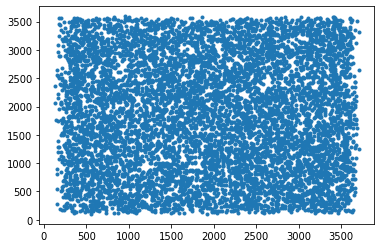

In [18]:
plt.plot(crd[0,:],crd[2,:], '.')

In [13]:
data['particles'].keys()[0]

'_rlncoordinatex'